In [3]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

c:\Users\NongNam\Documents\AI_Builder\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset you created
df = pd.read_csv("descriptor.csv")
df = df.copy()
df = df[df['Kd'].notnull()]  # Remove NaN
df = df[np.isfinite(df['Kd'])]  # Remove inf/-inf

train_data = df

In [3]:
# Create AutoGluon predictor for regression (use MSE as metric, for example)
predictor = TabularPredictor(
    label='Kd',  # or 'Kd' depending on your target transform
    problem_type='regression',
    eval_metric='mean_squared_error',
    path='Model/'
).fit(
    train_data=train_data,
    presets='best_quality',
    num_bag_folds=5,
    num_stack_levels=2,
    time_limit=7200
)

predictor.leaderboard(silent=True)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       0.79 GB / 7.42 GB (10.7%)
Disk Space Avail:   16.52 GB / 262.54 GB (6.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up to 

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L4,-1.379975,mean_squared_error,174.047651,4800.037093,0.003071,1.165884,4,True,57
1,NeuralNetFastAI_BAG_L3,-1.382052,mean_squared_error,168.743796,4272.522665,0.907109,80.486613,3,True,47
2,NeuralNetFastAI_r191_BAG_L3,-1.385434,mean_squared_error,170.763906,4591.095208,2.927218,399.059157,3,True,54
3,WeightedEnsemble_L3,-1.385820,mean_squared_error,132.788765,2947.080640,0.005999,1.218633,3,True,41
4,CatBoost_r9_BAG_L3,-1.387539,mean_squared_error,167.894095,4265.822108,0.057408,73.786057,3,True,55
5,CatBoost_BAG_L3,-1.389044,mean_squared_error,167.885238,4222.902659,0.048551,30.866607,3,True,45
6,LightGBM_r96_BAG_L3,-1.389256,mean_squared_error,169.239162,4200.305068,1.402475,8.269016,3,True,56
7,CatBoost_r177_BAG_L3,-1.389384,mean_squared_error,167.875591,4215.176412,0.038903,23.140360,3,True,51
8,LightGBM_r131_BAG_L3,-1.389604,mean_squared_error,168.619776,4203.228499,0.783088,11.192447,3,True,53
9,LightGBM_BAG_L3,-1.390154,mean_squared_error,167.968570,4196.723794,0.131883,4.687742,3,True,43


In [4]:
# Load your test dataset (CSV or other)
test_data = pd.read_csv('descriptor_test.csv')

# Optional: If your test set includes the target column, keep a copy
y_test = test_data['Kd']
test_data_nolabel = test_data.drop(columns=['Kd'])

In [5]:
# load model
predictor = TabularPredictor.load('Model/')


In [6]:
# Predict using the loaded model
predictions = predictor.predict(test_data_nolabel)

# Show predictions
print(predictions)

performance = predictor.evaluate(test_data)
y_pred = predictor.predict(test_data_nolabel)
print(performance)

0       5.942525
1       5.515905
2       6.232880
3       5.754404
4       7.896855
          ...   
6107    6.505783
6108    7.523473
6109    6.084754
6110    5.390191
6111    5.423370
Name: Kd, Length: 6112, dtype: float32
{'mean_squared_error': -1.4099917584406039, 'root_mean_squared_error': np.float64(-1.1874307383761815), 'mean_absolute_error': -0.8712076130300676, 'r2': 0.4606621326711582, 'pearsonr': 0.6790268937062293, 'median_absolute_error': np.float64(-0.582467732543694)}


C:\Users\NongNam\AppData\Local\Temp\ipykernel_20468\897430231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_20468\897430231.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


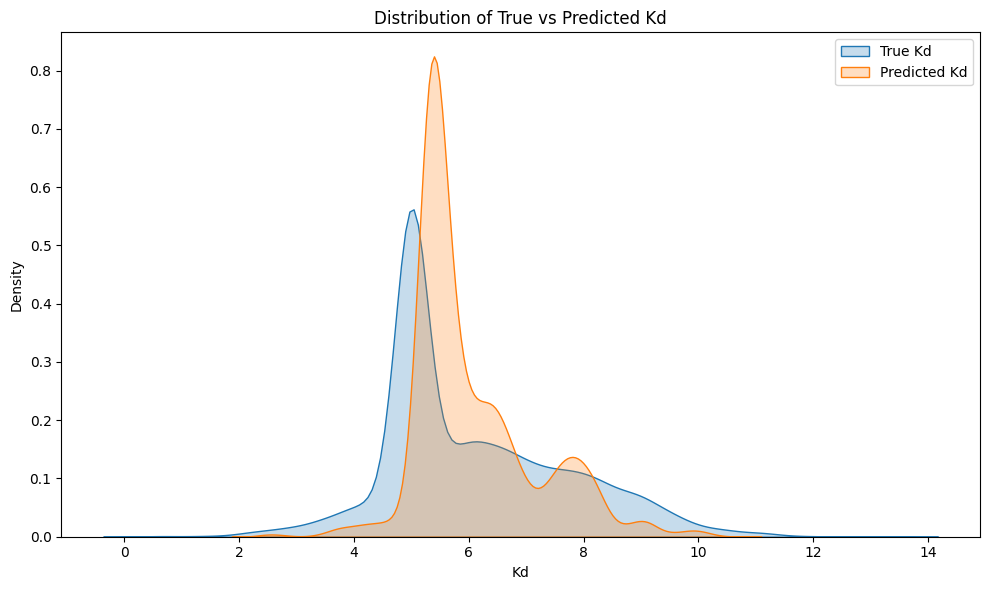

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()